<a href="https://colab.research.google.com/github/rivuletsteph/TIAER/blob/main/NWM%20Retrospective%20v3%20Data%20Access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accessing the NWM retrospective analysis version 3.0 (Zarr)

---
Based on [MataBraz_V1](https://colab.research.google.com/drive/1gapgdfosRM_1R6kt1OU89rmtwfgEu0o_?usp=sharing)

The purpose of this notebook is to download flow data for a specified reach and time.

Visit the [National Water Prediction Service Interactive Map](https://water.noaa.gov/map) to locate NWM Reach IDs.

Last updated 12/17/2024 sbrady@tarleton.edu

In [1]:
!pip install s3fs
!pip install zarr
!pip install dask distributed --upgrade

import fsspec
import numpy as np
import os
import s3fs
import xarray as xr
import zarr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 54.4 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=d3bb3465b31439c520448d66173e29b63d3746670c7e99272955b1cdf9e31d14
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2024.10.0
    Uninstalling dask-2024.10.0:
      Succes

In [2]:
reach_id=  1576376
start_datetime = '2019-08-18 00:00'
end_datetime = '2019-10-07 23:00'


Create notebook output folder

In [3]:
!mkdir output

In [4]:
folder = os.getcwd()+'/output'

Setup Dask.distributed the [Easy Way](https://distributed.dask.org/en/stable/quickstart.html#setup-dask-distributed-the-easy-way)

In [5]:
from dask.distributed import Client, progress
client = Client()
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:34227
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44303'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38397'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:35091 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35091
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:37714
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:38147 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38147
INFO:distributed.core:Starting established connection to tcp://127

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34227,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:35091,Total threads: 1
Dashboard: http://127.0.0.1:36653/status,Memory: 6.34 GiB
Nanny: tcp://127.0.0.1:44303,


Point to the AWS CLI (Amazon Web Services Command Line Interface) where the data is storred in Zarr format.

In [6]:
url= 's3://noaa-nwm-retrospective-3-0-pds/CONUS/zarr/chrtout.zarr'

Print the [CPU Time and Wall Time](https://ipython.readthedocs.io/en/stable/interactive/magics.html?highlight=%25time#magic-time)  
Load and decode a dataset from the Zarr [store](https://docs.xarray.dev/en/stable/generated/xarray.open_zarr.html)  
Usually takes about 5-10 seconds

In [7]:
%%time
nwm_ds_hourly = xr.open_zarr(fsspec.get_mapper(url, anon=True), consolidated=True)

CPU times: user 3.43 s, sys: 323 ms, total: 3.76 s
Wall time: 10.8 s


Print the dataset description

In [8]:
nwm_ds_hourly

<xarray.Dataset> Size: 51TB
Dimensions:         (feature_id: 2776734, time: 385704)
Coordinates:
    elevation       (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
    gage_id         (feature_id) |S15 42MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    latitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    longitude       (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    order           (feature_id) int32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
  * time            (time) datetime64[ns] 3MB 1979-02-01T01:00:00 ... 2023-02-01
Data variables:
    crs             |S1 1B ...
    qBtmVertRunoff  (time, feature_id) float64 9TB dask.array<chunksize=(672, 30000), meta=np.ndarray>
    qBucket         (time, feature_id) float64 9TB dask.array<chunksize=(672, 30000), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 9TB dask.array<chunksize=(672, 30000), meta=np.ndarray>
    q_lateral       (time, feature_id) float64 9TB dask.array<chunksize=(672, 30000), meta=np.ndarray>
    streamflow      (time, feature_id) float64 9TB dask.array<chunksize=(672, 30000), meta=np.ndarray>
    velocity        (time, feature_id) float64 9TB dask.array<chunksize=(672, 30000), meta=np.ndarray>
Attributes:
    NCO:                  netCDF Operators version 5.1.4 (Homepage = http://n...
    TITLE:                OUTPUT FROM WRF-Hydro v5.3.0-alpha1
    code_version:         v5.3.0-alpha1
    featureType:          timeSeries
    history:              Thu Sep 28 07:58:36 2023: ncatted -O -a missing_val...
    model_configuration:  retrospective
    proj4:                +proj=lcc +units=m +a=6370000.0 +b=6370000.0 +lat_1...

Identify what reach or reaches for which the NWM streamflows will be downloaded.

For multiple reaches, use the syntax "reaches = np.sort(np.array([x1,x2,...]))".

In [9]:
reach = np.sort(np.array([reach_id]))

Print the wall time.  
Extract the flow data for the specified reach and  time period.  

In [10]:
%%time
nwm_ds_hourly_subset = nwm_ds_hourly.streamflow.sel(feature_id=reach, time=slice(start_datetime,end_datetime)).compute()

CPU times: user 1.11 s, sys: 464 ms, total: 1.57 s
Wall time: 6 s


In [11]:
nwm_ds_hourly_subset

<xarray.DataArray 'streamflow' (time: 1224, feature_id: 1)> Size: 10kB
array([[0.02],
       [0.02],
       [0.02],
       ...,
       [0.03],
       [0.03],
       [0.03]])
Coordinates:
    elevation   (feature_id) float32 4B 0.0
  * feature_id  (feature_id) int64 8B 1576376
    gage_id     (feature_id) |S15 15B b'               '
    latitude    (feature_id) float32 4B 28.94
    longitude   (feature_id) float32 4B -95.3
    order       (feature_id) int32 4B 1
  * time        (time) datetime64[ns] 10kB 2019-08-18 ... 2019-10-07T23:00:00
Attributes:
    grid_mapping:  crs
    long_name:     River Flow
    units:         m3 s-1

Convert the dataset array into a dataframe.

In [12]:
raw_nwm_df= nwm_ds_hourly_subset.to_pandas()

In [13]:
raw_nwm_df

feature_id,1576376
time,
2019-08-18 00:00:00,0.02
2019-08-18 01:00:00,0.02
2019-08-18 02:00:00,0.02
2019-08-18 03:00:00,0.02
2019-08-18 04:00:00,0.02
...,...
2019-10-07 19:00:00,0.03
2019-10-07 20:00:00,0.03
2019-10-07 21:00:00,0.03


Create Hydrograph for the Raw NWM data (hourly)

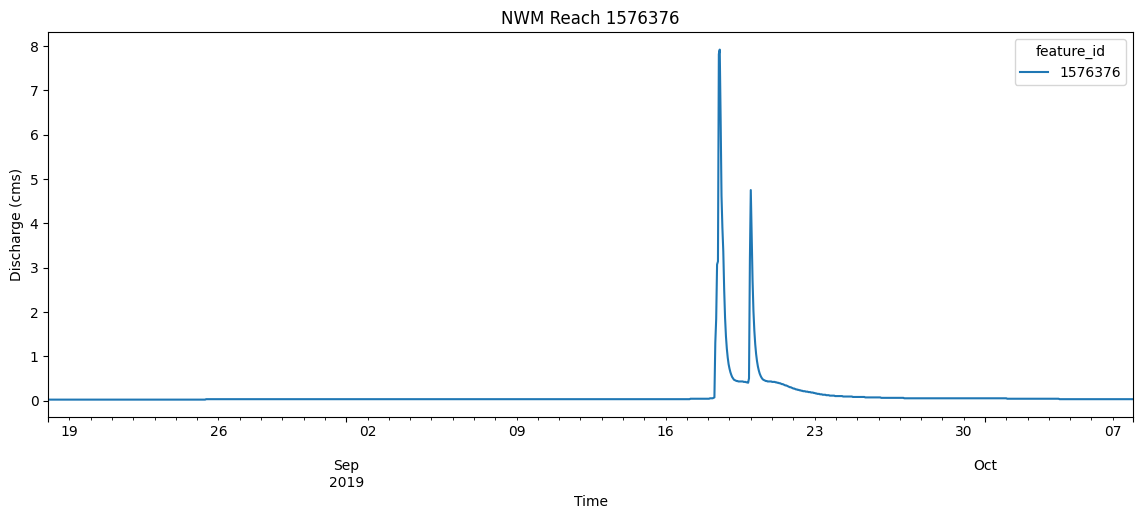

In [14]:
raw_nwm_df.plot(figsize=(14,5), title= "NWM Reach "+ str(reach_id), xlabel="Time", ylabel="Discharge (cms)");

Create a new index column

In [15]:
nwm_df=raw_nwm_df.reset_index()

Update the column names

In [16]:
nwm_df.rename({'time': 'Date_Time', reach_id: 'NWM_cms'}, axis=1, inplace=True)

Calulate discharge in CFS



In [17]:
nwm_df["NWM_cfs"] = nwm_df["NWM_cms"]*35.314666212661

In [18]:
nwm_df['Date_Time'] = nwm_df['Date_Time'].dt.tz_localize('UTC').dt.tz_convert('America/Chicago').dt.tz_localize(None)

Export wrangled NWM dataframe to a csv file

In [19]:
nwm_df

feature_id,Date_Time,NWM_cms,NWM_cfs
0,2019-08-17 19:00:00,0.02,0.706293
1,2019-08-17 20:00:00,0.02,0.706293
2,2019-08-17 21:00:00,0.02,0.706293
3,2019-08-17 22:00:00,0.02,0.706293
4,2019-08-17 23:00:00,0.02,0.706293
...,...,...,...
1219,2019-10-07 14:00:00,0.03,1.059440
1220,2019-10-07 15:00:00,0.03,1.059440
1221,2019-10-07 16:00:00,0.03,1.059440
1222,2019-10-07 17:00:00,0.03,1.059440


In [20]:
nwm_df.to_csv(folder +'/NWM_Data_for_' + str(reach_id)  + '.csv')